# Week 4
## SIR with vaccination

Consider two different groups of people, those who have received a vaccine (denoted subscript $V$) and those who haven't (denoted subscript $N$). The total population size is $N$ and and number of vaccinated is $N_v$. The vaccine prevents infection with a rate of $\alpha$.

Hence we have
$$
\begin{align*}
S &\xrightarrow{\beta(I+I_V)S} I \xrightarrow{\mu I} R,\\
S_V &\xrightarrow{\beta(1-\alpha)(I+I_V)S_V} I_V \xrightarrow{\mu I_V} R_V.
\end{align*}
$$

Assuming $S\approx N$ and $S_V\approx N_V$ gives

$$
\begin{align*}
q_{1,0} = \frac{\beta N}{\beta N + \mu + \beta(1-\alpha)N_V}q_{2,0} + \frac{\mu}{\beta N + \mu + \beta(1-\alpha)N_V}q_{0,0} + \frac{\beta(1-\alpha)N_V}{\beta N + \mu + \beta(1-\alpha)N_V}q_{1,1} \\

q_{0,1} = \frac{\beta(1-\alpha)N_V}{\beta(1-\alpha)N_V + \mu + \beta N}q_{0,2} + \frac{\mu}{\beta(1-\alpha)N_V + \mu + \beta N}q_{0,0} + \frac{\beta N}{\beta (1-\alpha)N_V + \mu + \beta N}q_{1,1} \\
\end{align*}
$$

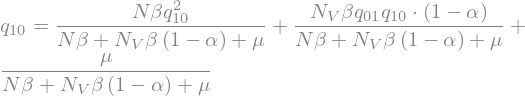

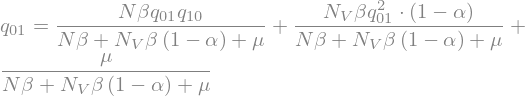

In [3]:
from sympy import *
init_printing()

mu, beta, alpha = symbols("mu beta alpha")
N, N_V = symbols("N N_V")

q, q_v = symbols("q_10 q_01")

sum1=beta*N + mu + beta*(1-alpha)*N_V
sum2=beta*(1-alpha)*N_V + mu + beta*N

eq1 = Eq(q, q**2*beta*N/sum1 + mu/sum1 + q*q_v*beta*N_V*(1-alpha)/sum1)
display(eq1)
eq2 = Eq(q_v, q_v**2*beta*(1-alpha)*N_V/(sum2) + mu/(sum2) + q*q_v*beta*N/(sum2))
display(eq2)

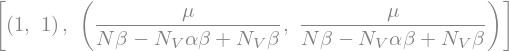

In [4]:
sol = solve([eq1, eq2], [q, q_v])
display(sol)

In [5]:
print(latex((1 - sol[1][0]).simplify()))

\frac{N \beta - N_{V} \alpha \beta + N_{V} \beta - \mu}{\beta \left(N - N_{V} \alpha + N_{V}\right)}


In [6]:
_N_V = 100
_N = 500
_R_0 = 1.5
_mu = 1/8
_beta = _R_0*_mu/(_N+_N_V)
_alpha = 0.2

for s in sol[1]:
    tmp = s.subs(N_V, _N_V).subs(N,_N).subs(mu,_mu).subs(beta, _beta).subs(alpha, _alpha)
    print(1 - float(tmp))

0.31034482758620685
0.31034482758620685


## Gillespie

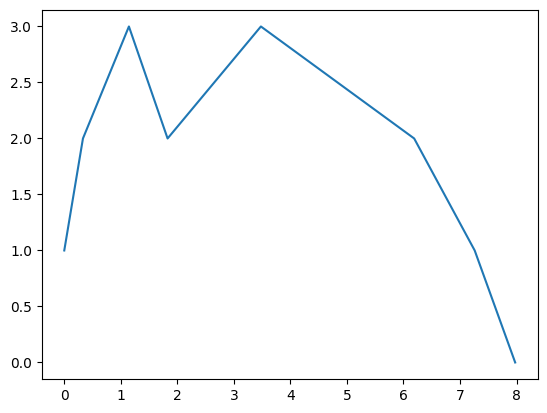

In [7]:
from bp_models.gillespie import direct_gillespie_sir_vaccine
import numpy as np
import matplotlib.pyplot as plt

t, I, I_V, _ = direct_gillespie_sir_vaccine(_N, _N_V, _beta, _mu, _alpha)

I = np.asarray(I)
I_V = np.asarray(I_V)

plt.plot(t, I+I_V)

In [8]:
from bp_models.gillespie import run_ensemble_sir_vaccine
num_sims = 500

ts, Is, infections, max_t = run_ensemble_sir_vaccine(_N, _N_V, _beta, _mu, _alpha, num_sims)

100%|██████████| 500/500 [00:00<00:00, 36753.45it/s]


In [9]:
print(f"Proportion of major outbreaks: {np.sum(infections/(_N + _N_V) > 0.2)/num_sims}")

Proportion of major outbreaks: 0.306


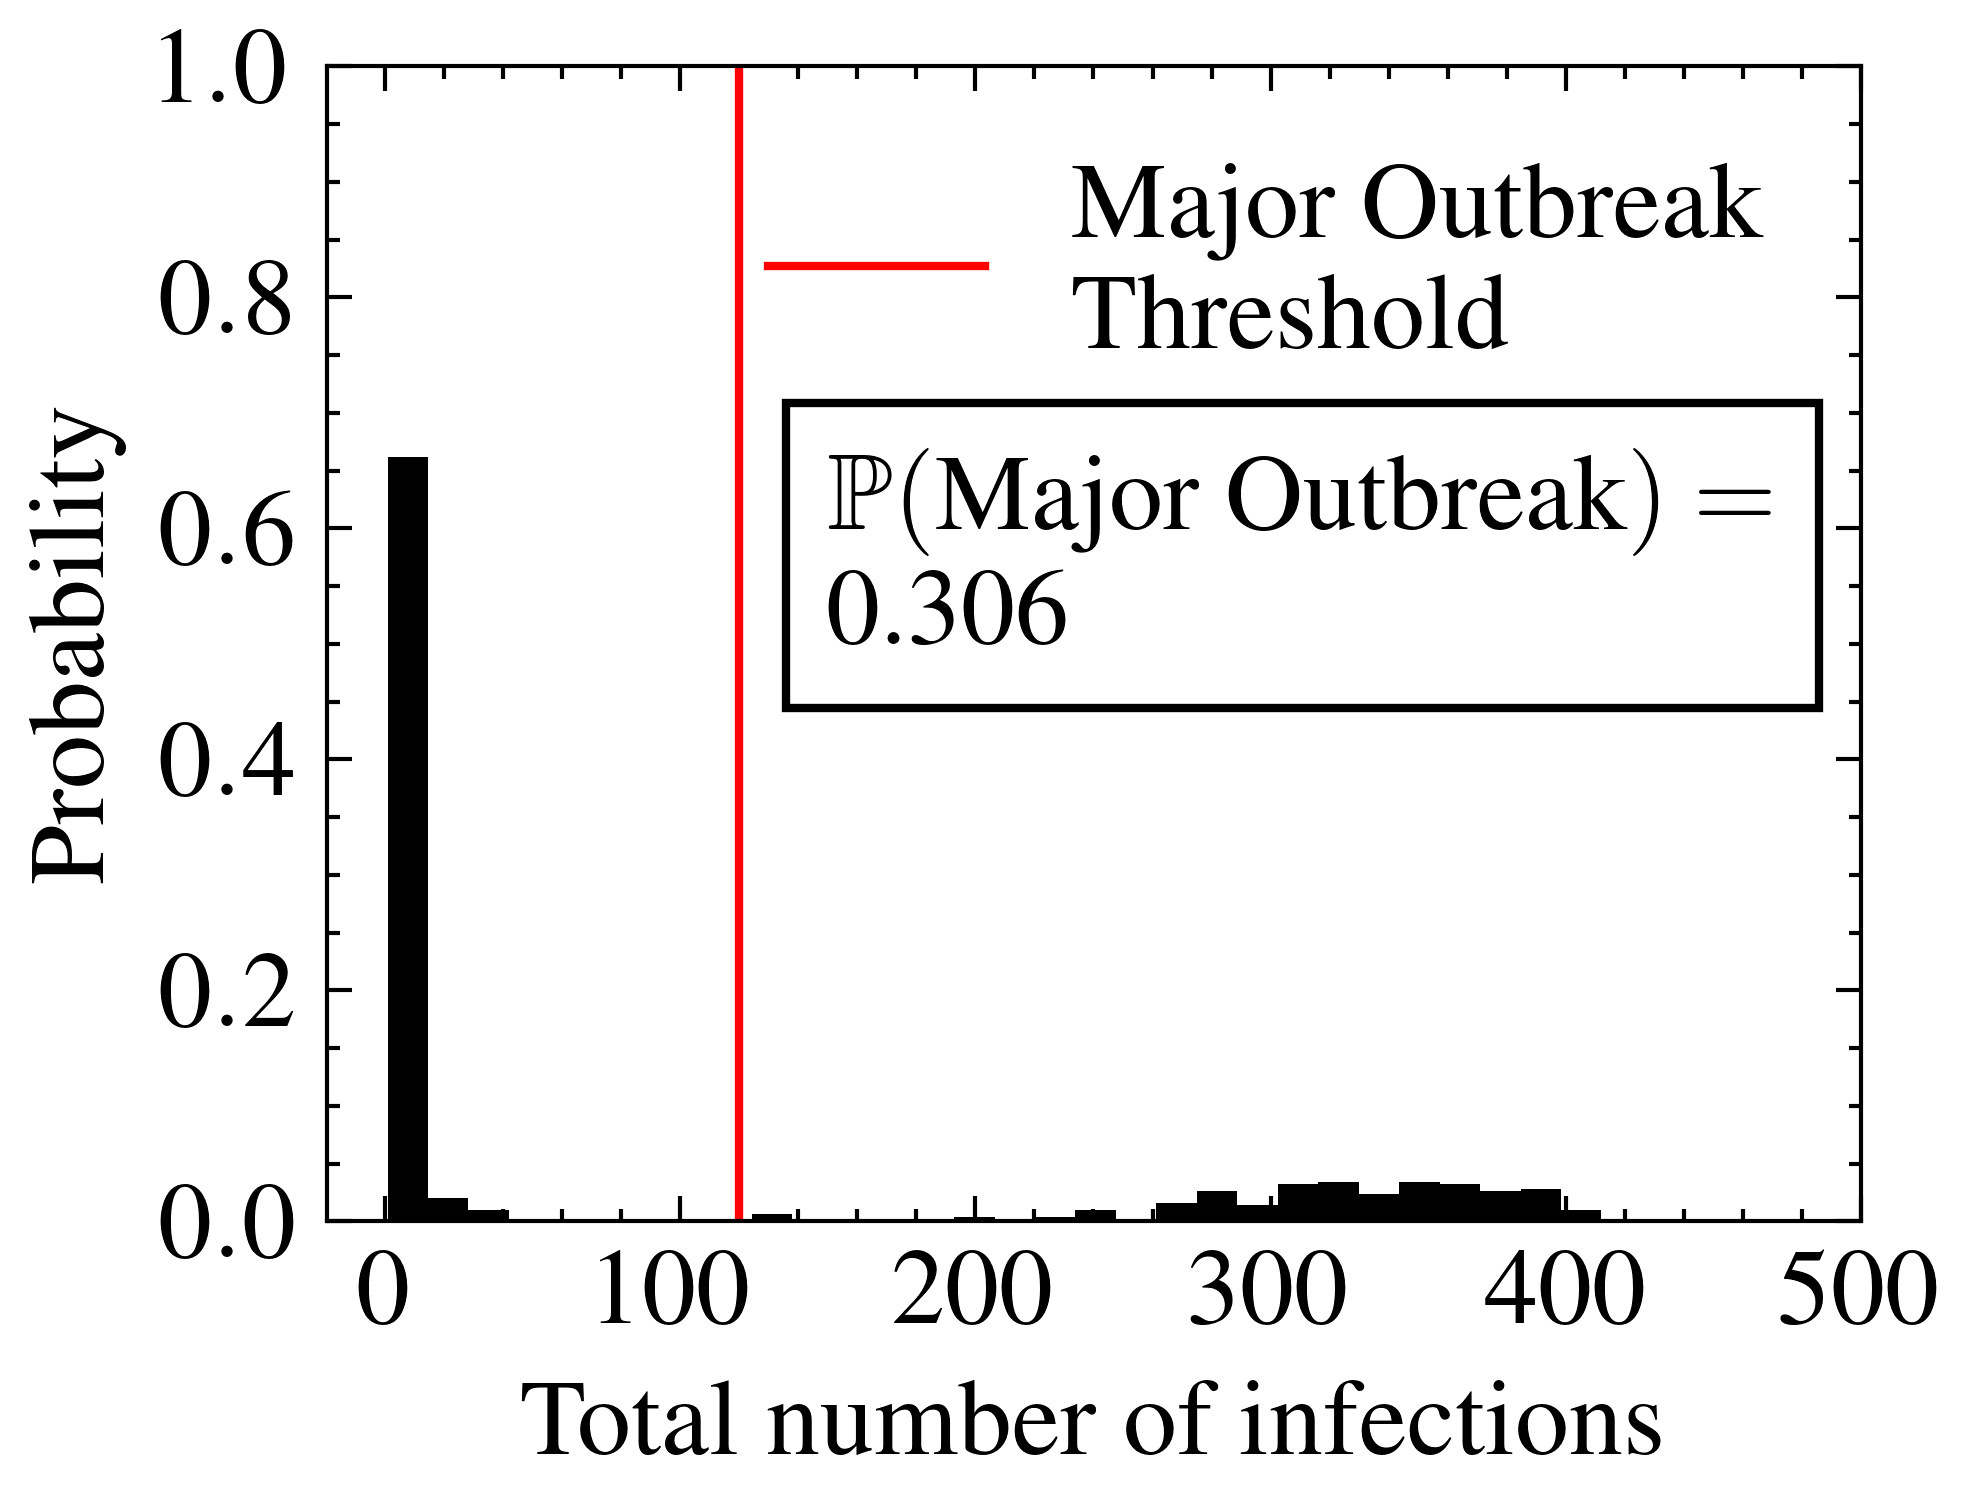

In [10]:
plt.style.use(['science','ieee'])
plt.rcParams['font.size'] = 13

fig, ax = plt.subplots()
R_finals = np.asarray(infections)

ax.hist(R_finals, bins=30, weights=np.ones_like(R_finals)/len(R_finals))
ax.plot(2*[(_N+_N_V)*0.2],[0,1], 'r-', label="Major Outbreak\n Threshold")
ax.text(150,0.5, r"$\mathbb{P}(\text{Major Outbreak})=$"+"\n"+str(np.sum(R_finals/(_N+_N_V) > 0.2)/num_sims), bbox=dict(facecolor='none', edgecolor='black', pad=5.0))
ax.set_ylabel("Probability")
ax.set_xlabel("Total number of infections")
ax.set_ylim([0, 1])
ax.set_xticks(100*np.arange(0,6))
ax.legend()
plt.savefig("figures/hist_vaccine.pdf")

/tmp/ipykernel_2682992/3317524053.py:13: RuntimeWarning: Mean of empty slice
  ax.plot(plot_t, np.nanmean(padded_data, axis=0), 'k', linewidth=2, label="Mean")
/home/jakeb/development/Branching-Process-Models/venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


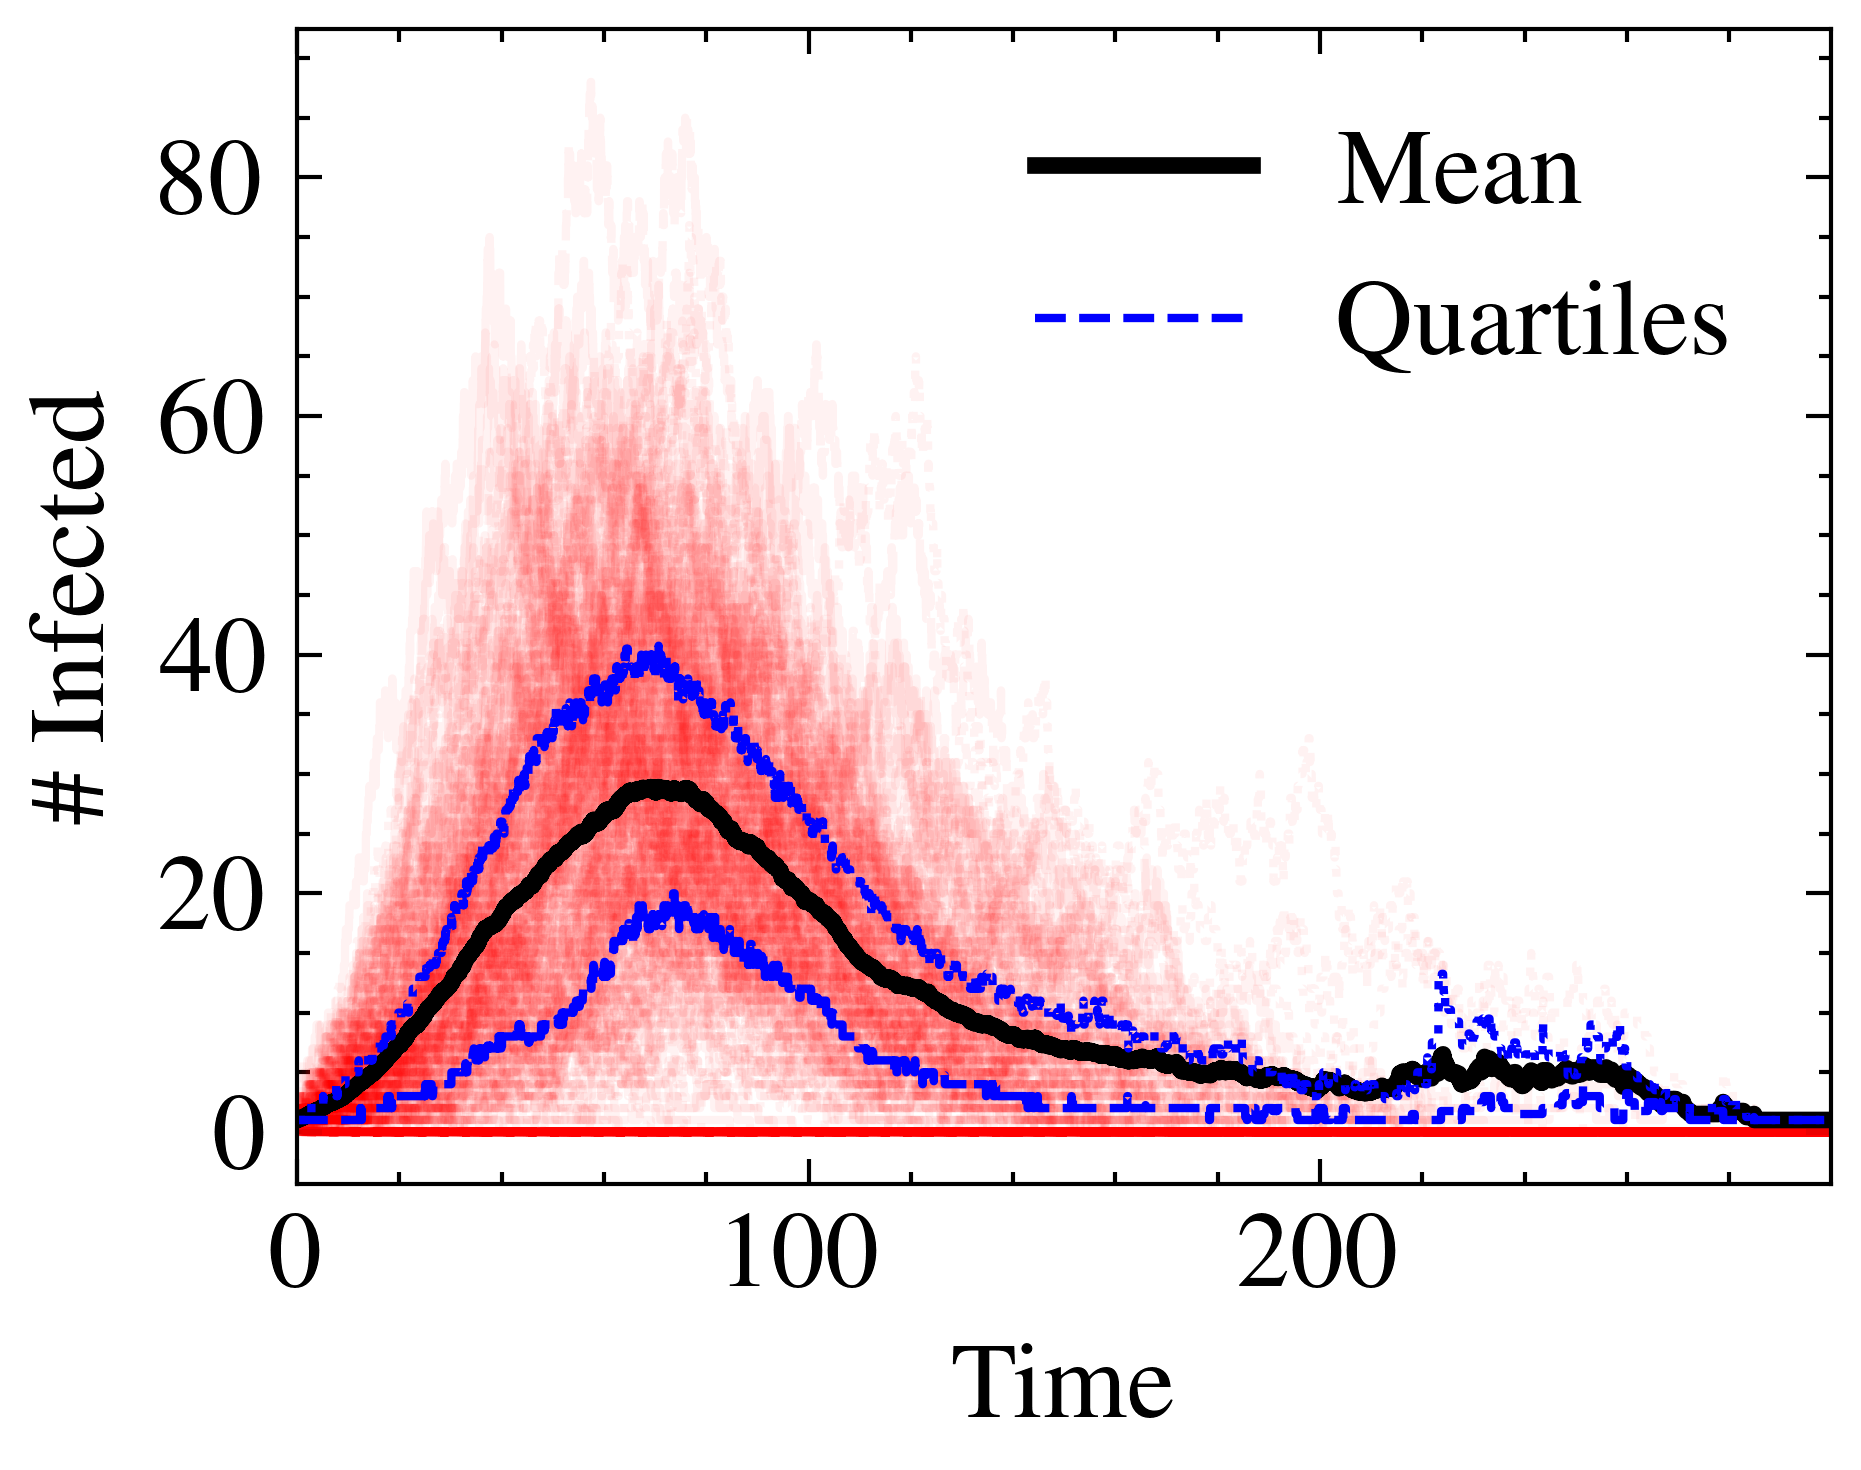

In [9]:
from scipy.interpolate import interp1d

fig, ax = plt.subplots()
plot_t = np.linspace(0, max_t, num=int(max_t)*1000)
padded_data = np.empty((num_sims, plot_t.size))
for i, (t, s) in enumerate(zip(ts, Is)):
    padded = interp1d(t, s, bounds_error=False, fill_value=0, kind='previous')(plot_t)
    padded_data[i,:] = padded

padded_data = np.asarray(padded_data)
ax.plot(plot_t, padded_data.T, 'r', alpha=0.05)
padded_data[padded_data == 0] = np.nan
ax.plot(plot_t, np.nanmean(padded_data, axis=0), 'k', linewidth=2, label="Mean")
ax.plot(plot_t, np.nanquantile(padded_data, 0.25, axis=0), 'b', linewidth=1, label="Quartiles")
ax.plot(plot_t, np.nanquantile(padded_data, 0.75, axis=0), 'b', linewidth=1, label="_nolegend_")
#ax.plot(sol.t, sol.y[1,:], label="Deterministic")

ax.legend()

ax.set_xlabel("Time")
ax.set_ylabel("\# Infected")
ax.set_xlim([0, max_t])
fig.savefig("figures/gillespie_vac.pdf")

In [10]:
_beta

: 

/tmp/ipykernel_495883/1689418054.py:11: RuntimeWarning: divide by zero encountered in divide
  q = mu/(N*beta - N_V*alpha*beta + N_V*beta)


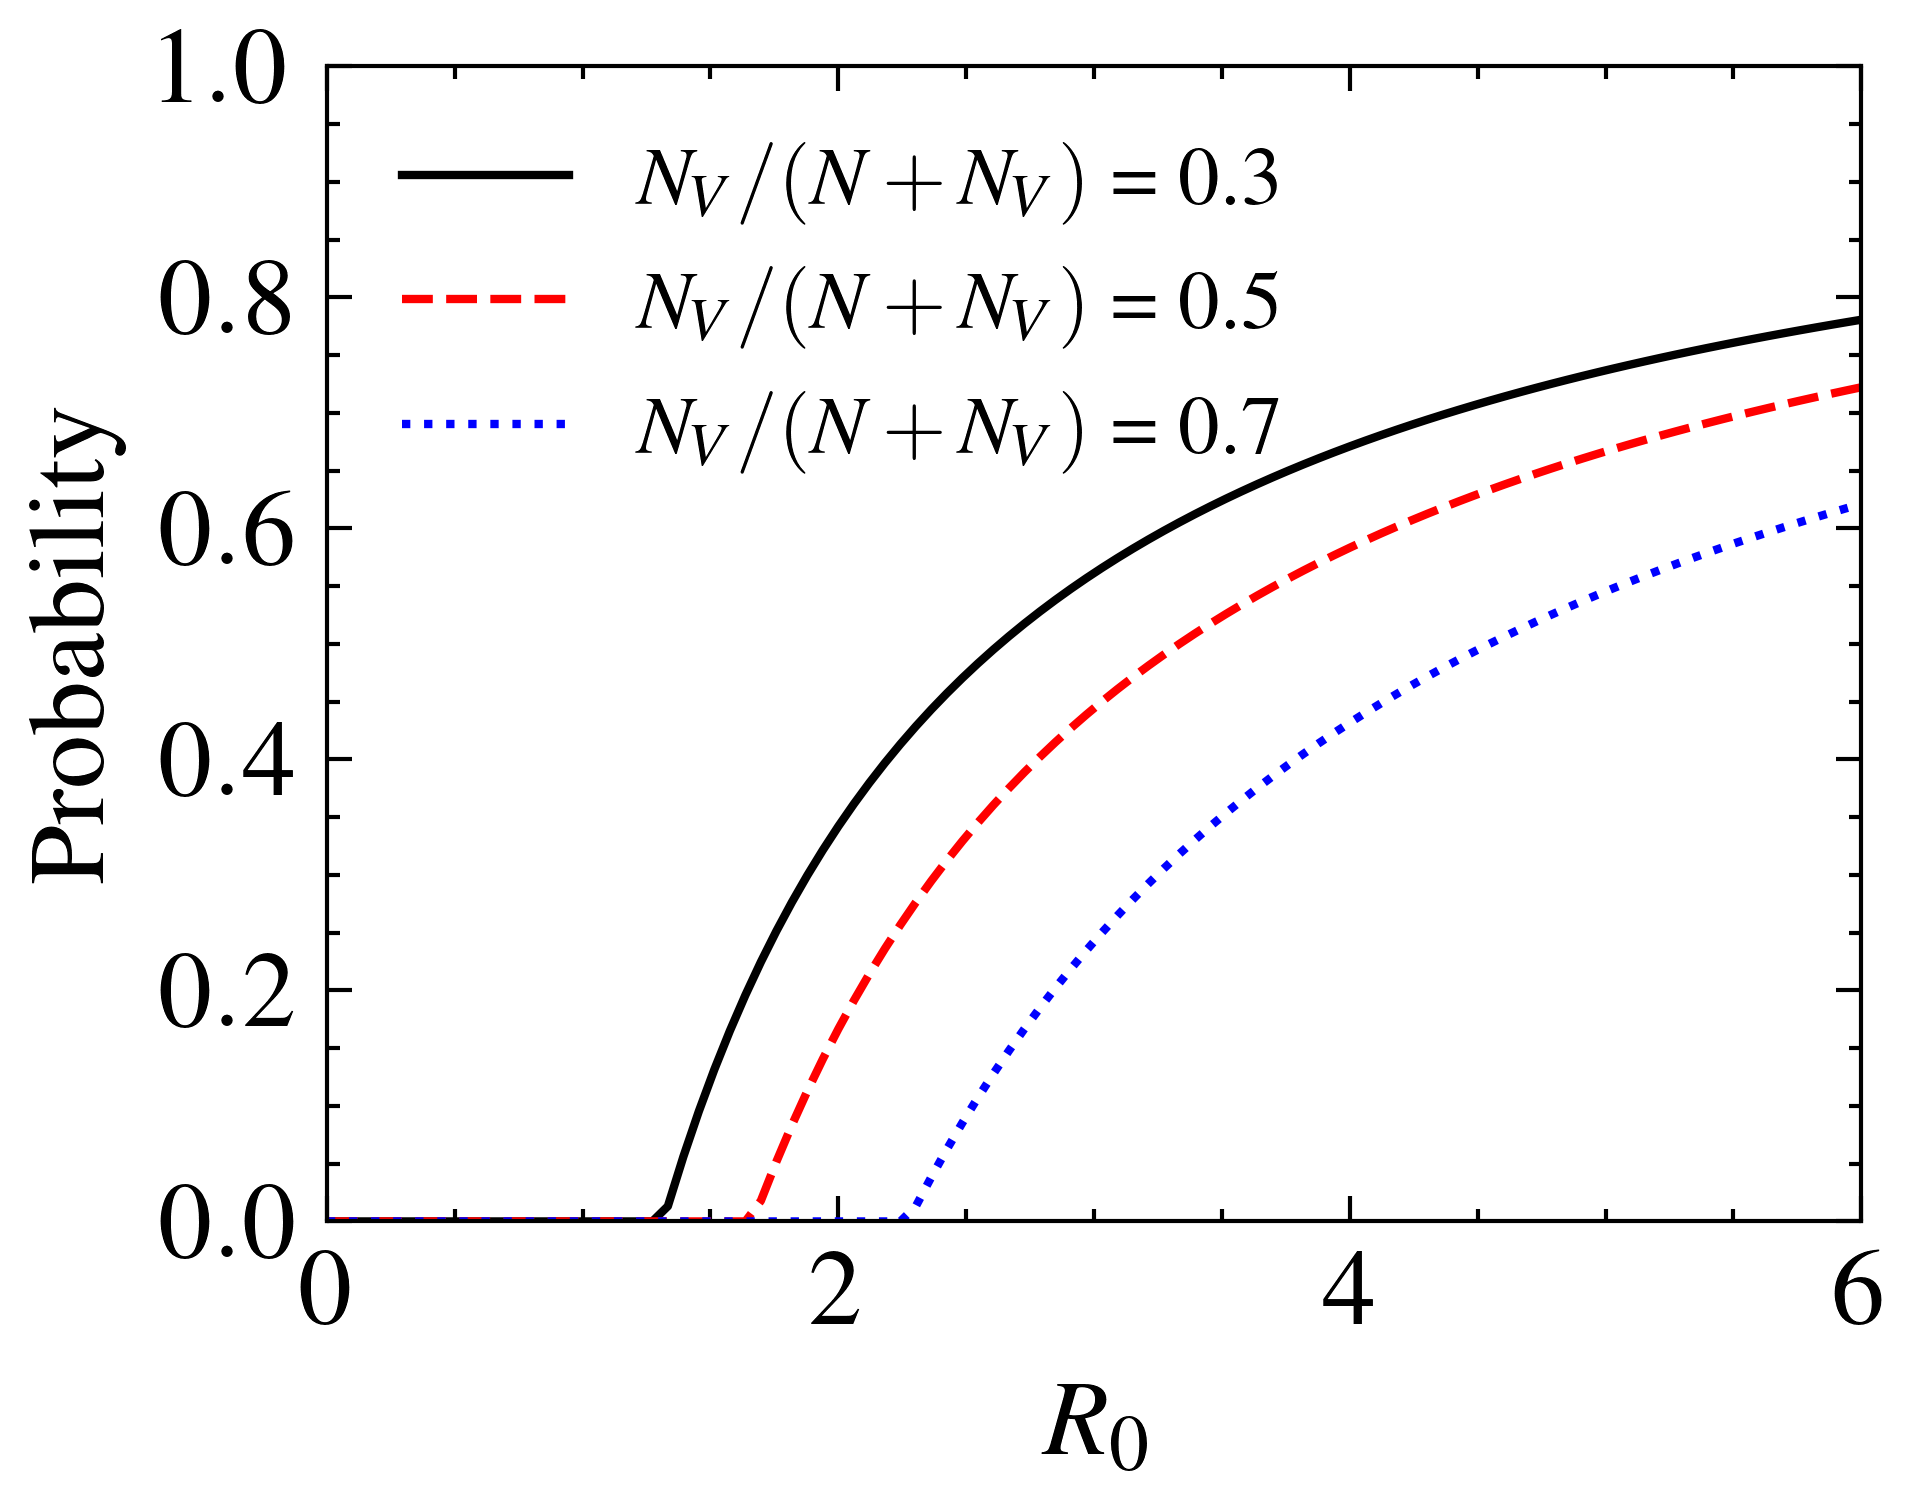

In [20]:
R_0 = np.linspace(0, 6, num=100)
total_pop = 100_000
alpha = 0.8

fig, ax = plt.subplots()
for prop_vaccinated in [0.3, 0.5, 0.7]:
    N = total_pop*(1-prop_vaccinated)
    N_V = total_pop*prop_vaccinated
    mu = 1/8
    beta = R_0*mu/(N+N_V)
    q = mu/(N*beta - N_V*alpha*beta + N_V*beta)

    ax.plot(R_0, 1-np.where((q < 1) & (q > 0), q, 1), label=f"$N_V/(N+N_V)$ = {prop_vaccinated}")
ax.set_xlim([0,6])
ax.set_ylim([0,1])
ax.legend(loc=2, fontsize=10)
ax.set_xlabel("$R_0$")
ax.set_ylabel("Probability")
ax.set_axisbelow(True)
fig.savefig("figures/vacbif.pdf")